<a href="https://colab.research.google.com/github/RanjithAmirneni/DataScience/blob/main/08-NaturalLanguageProcessing(NLP)/01_TestPreprocessing_(step2)_in_NLP_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

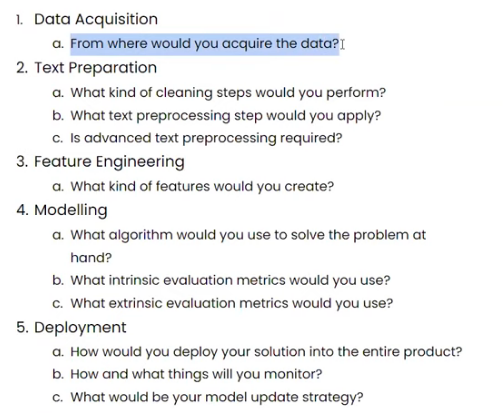

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/DataScience/08-NLP(Natural_Language_Processing)/IMDB Dataset.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 1.Text Lower Casing

In [ ]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
df['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [ ]:
#this will convert entire review column text to lower case.
df['review'].str.lower()

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

## 2.Remove HTML tags in the text

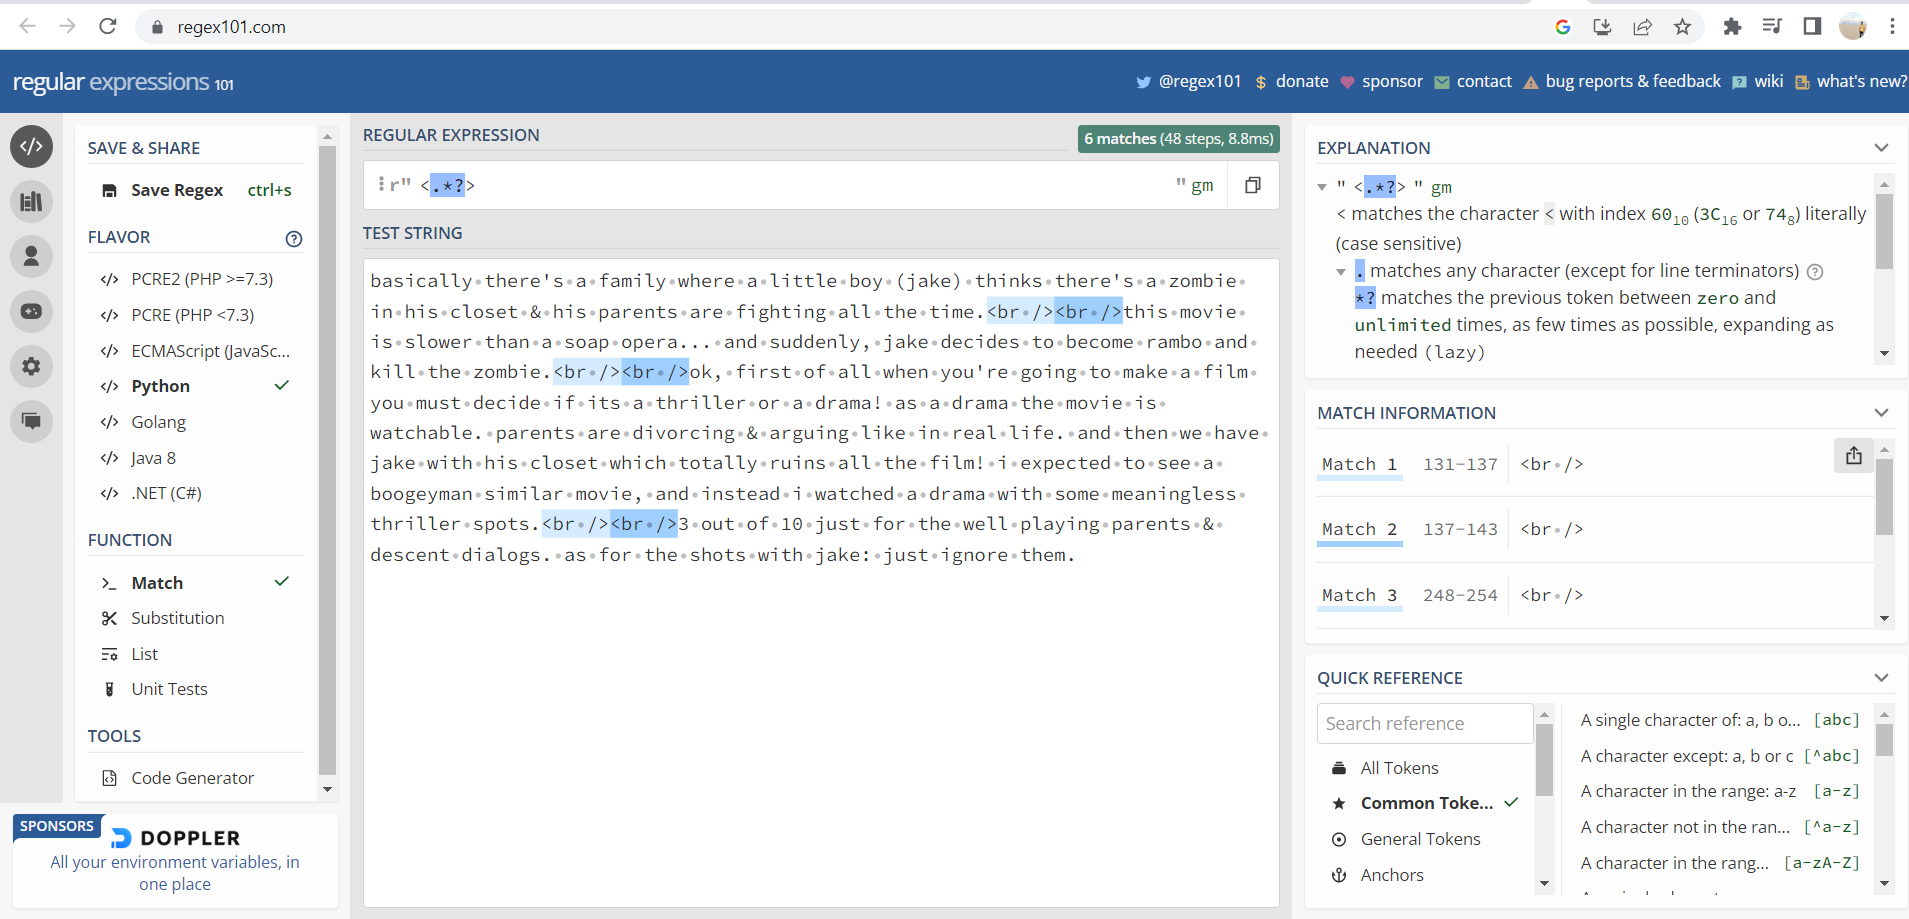

In [ ]:
import re
def remove_html_tags_in_text(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r"",text)

In [ ]:
text = "basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [ ]:
print(remove_html_tags_in_text(text))

basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them.


In [ ]:
#Apply to entire dataframe column data using apply function
df['review'].apply(remove_html_tags_in_text)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

## 3.Remove URL's in the text

In [ ]:
def remove_url_from_text(text):
  pattern = re.compile(r'https?://\S+|www\..\S+')
  return pattern.sub(r"",text)


In [ ]:
text1='Check out my notebook at https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews'
text2='Google Search here www.google.com'
text3='For my notebook search here at http://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews the data to remove'


In [ ]:
text3

'For my notebook search here at http://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews the data to remove'

In [ ]:
print(remove_url_from_text(text1))
print(remove_url_from_text(text2))
print(remove_url_from_text(text3))

Check out my notebook at 
Google Search here 
For my notebook search here at  the data to remove


## 4.Removing puntuations and any kind of special characters in english letters:

In [ ]:
python_punctuations_list_in_english='''!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~'''

In [ ]:
import string, time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude= string.punctuation

In [ ]:
def remove_punct_in_text(text):
  for char in exclude:
    text = text.replace(char,'')
  return text

In [ ]:
text = 'string.with._+} ^?"+}:#&%%#)&)%$@_)punctuation?'

In [ ]:
start = time.time()
print(remove_punct_in_text(text))
total_time_taken1 = time.time() - start
print(total_time_taken1)

stringwith punctuation
0.0018985271453857422


In [ ]:
def remove_punct_in_text1(text):
  
  return text.translate(str.maketrans('', '',exclude))
      

In [ ]:
start = time.time()
print(remove_punct_in_text1(text))
total_time_taken2 = time.time() - start
print(total_time_taken2)

stringwith punctuation
0.0025255680084228516


In [ ]:
total_time_taken1/total_time_taken2

0.7517228358349853

In [ ]:
# lets apply this logic to a full data set.

In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/DataScience/08-NLP(Natural_Language_Processing)/Twitter_sentiment_analysis_train.csv'

In [ ]:
df1= pd.read_csv(path)

In [ ]:
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df1['tweet'] = df1['tweet'].apply(remove_punct_in_text1)

In [ ]:
df1.head()

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


## 5.Chat word treatment

In [ ]:
chat_data={'AFAIK' : 'As Far As I Know',
'AFK':'Away From Keyboard',
'ASAP':'As Soon As Possible',
'ATK':'At The Keyboard',
'ATM':'At The Moment',
'A3':'Anytime, Anywhere, Anyplace',
'BAK':'Back At Keyboard',
'BBL':'Be Back Later',
'BBS':'Be Back Soon',
'BFN':'Bye For Now',
'B4N':'Bye For Now',
'BRB':'Be Right Back',
'BRT':'Be Right There',
'BTW':'By The Way',
'B4':'Before',
'B4N':'Bye For Now',
'CU':'See You',
'CUL8R':'See You',
'FAQ':'Frequently Asked Questions',
'FC':'Fingers Crossed',
'FWIW':'For What Its Worth',
'FYI':'For Your Information',
'GAL':'Get A Life',
'GG':'Good Game',
'GN':'Good Night',
'GMTA':'Great Minds Think Alike',
'GR8':'Great!',
'G9':'Genius',
'IC':'I See',
'ICQ':'I Seek you (also a chat program)',
'ILU':'I Love You',
'IMHO':'In My Honest/Humble Opinion',
'IMO':'In My Opinion',
'IOW':'In Other Words',
'IRL':'In Real Life',
'KISS':'Keep It Simple, Stupid',
'LDR':'Long Distance Relationship',
'LMAO':'Laugh My A.. Off',
'LOL':'Laughing Out Loud',
'LTNS':'Long Time No See',
'L8R':'Later',
'MTE':'My Thoughts Exactly',
'M8':'Mate',
'NRN':'No Reply Necessary',
'OIC':'Oh I See',
'PITA':'Pain In The A..',
'PRT':'Party',
'PRW':'Parents Are Watching',
'QPSA':'Que Pasa?',
'ROFL':'Rolling On The Floor Laughing',
'ROFLOL':'Rolling On The Floor Laughing Out Loud',
'ROTFLMAO':'Rolling On The Floor Laughing My A.. Off',
'SK8':'Skate',
'STATS':'Your sex and age',
'ASL':'Age, Sex, Location',
'THX':'Thank You',
'TTFN':'Ta-Ta For Now!',
'TTYL':'Talk To You Later',
'U':'You',
'U2':'You Too',
'U4E':'Yours For Ever',
'WB':'Welcome Back',
'WTF':'What The F...',
'WTG':'Way To Go!',
'WUF':'Where Are You From?',
'W8':'Wait...',
'7K':'Sick:-D Laugher'}

In [ ]:
def chat_conversation(text):
  new_text=[]
  for w in text.split():
    if w.upper() in chat_data:
      new_text.append(chat_data[w.upper()].replace(u'\xa0', u' '))
    else:
        new_text.append(w)
  
  return ' '.join(new_text)

In [ ]:
chat_conversation('IMHO is the best')

'In My Honest/Humble Opinion is the best'

In [ ]:
chat_conversation('FYI delhi is the capital of india')

'For Your Information delhi is the capital of india'

In [ ]:
chat_conversation('ILU  India')

'I Love You India'

## 6.Spelling Correction:

In [ ]:
from textblob import TextBlob

In [ ]:
inncorrect_text = 'ceertain condditions durring severral gggenerations aree moddiffied in tha saame Mannear'

In [ ]:
txtblb = TextBlob(inncorrect_text)

In [ ]:
txtblb.correct().string

'certain conditions during several generations are modified in the same Manner'

## 7.Removing Stop words in the text data

In english stop words are the words used for the sentence formation like 'and', 'for', 'the', 'my','of' etc but there will no meaning associated with them.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
list(stopwords.words('english'))

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
  new_text=[]
  for word in text.split():
    if word in list(stopwords.words('english')):
      new_text.append('')
    else:
        new_text.append(word)
  x= new_text[:]
  new_text.clear()
  return ' '.join(x)

In [ ]:
remove_stopwords("probably my all-time favorate movie,story of selfishness , sacrifice and dedication to a noble cause is also be in the home")

'probably  all-time favorate movie,story  selfishness , sacrifice  dedication   noble cause  also    home'

## 8.Handling Emojis in the text data

### Remove Emoji's

In [ ]:
import re
def remove_emoji(text):
  emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F" #emotions
                                u"\U0001F300-\U0001F5FF" #symbols and pictographs
                                u"\U0001F680-\U0001F6FF" #transport and map symbols
                                u"\U0001F1E0-\U0001F1FF" #flags (iOS)
                                u"\U00002702-\U000127B0"
                                u"\U000024C2-\U0001F251"
                                "]+",flags = re.UNICODE)
  return emoji_pattern.sub(r'',text)

In [ ]:
remove_emoji("I loved the movie 😘😘!")

'I loved the movie !'

In [ ]:
remove_emoji("Lmao 😂😂;")

'Lmao ;'

### Replace Emoji's with their meaning

In [ ]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=1b25ba7d058eebaa12596a472a58bdb80f0beb48cb10e5027255568ae6283280
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import emoji

print(emoji.demojize('Python is 🔥🥕'))

Python is :fire::carrot:


## 9.V-IMP Tokenization: 
- So tokenization is a process of basically breaking your text document into smaller parts which we call it as tokens. 
- So tokenization can be at sentence level or  word level , And tokens can be words , sentences , phrases etc.

Example1: I am an Indian  ----> ['I', 'am', 'an', 'Indian'] (tokenization at word level)

Example2: I am an Indian. I love my country  ----> ['I am an Indian', 'I love my country'] (tokenization at sentence level)

### **Q) Why we need to do tokenization?:**

Ans:Tokenization is the first step in any NLP pipeline. It has an important effect on the rest of your pipeline. A tokenizer breaks unstructured data and natural language text into chunks of information that can be considered as discrete elements. **The token occurrences in a document can be used directly as a vector representing that document**. 

**This immediately turns an unstructured string (text document) into a numerical data structure suitable for machine learning. They can also be used directly by a computer to trigger useful actions and responses. Or they might be used in a machine learning pipeline as features that trigger more complex decisions or behavior.**



Tokenization can separate sentences, words, characters, or subwords. When we split the text into sentences, we call it sentence tokenization. For words, we call it word tokenization.

Example of sentence tokenization


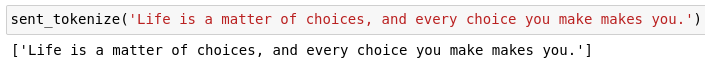

**Example of word tokenization:**

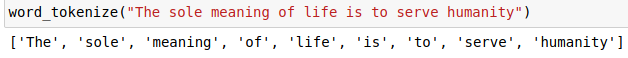

### Problems/Challenges while tokenization:

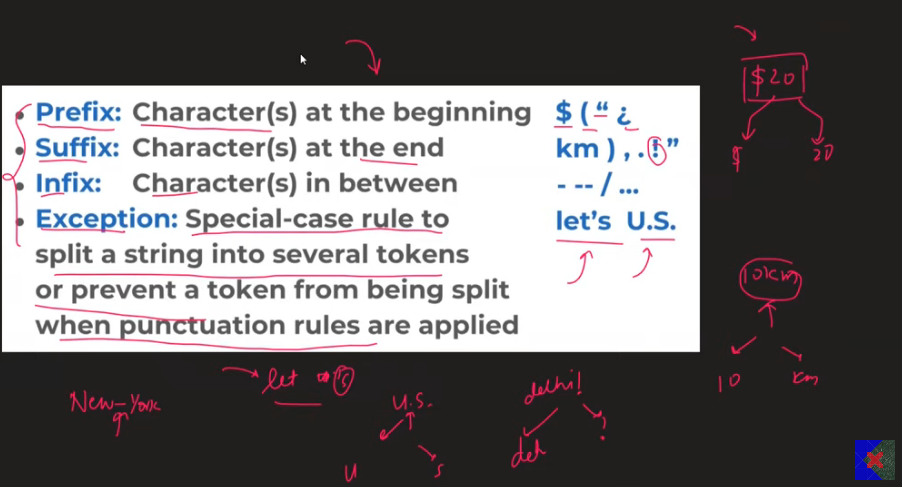

### Different ways of doing tokenization in code

#### 1.Using Split function

In [ ]:
#Word tokenization
sent1 = 'I am going to delhi'
sent1.split()

['I', 'am', 'going', 'to', 'delhi']

In [ ]:
#Sentence tokenization
sent2 = 'I am going to delhi. I will stay there for 2 days. Lets hope the trip to be great'
sent2.split('.')

['I am going to delhi',
 ' I will stay there for 2 days',
 ' Lets hope the trip to be great']

In [ ]:
#problems with split function
sent3 = 'I am going to delhi!'
sent3.split()

['I', 'am', 'going', 'to', 'delhi!']

In [ ]:
#problems with split function
sent4 = 'where do you think i should go? I have 3 day holiday'
sent4.split('.')

['where do you think i should go? I have 3 day holiday']

#### 2.Regular Expression:

In [ ]:
import re 
sent3 = "I am going to delhi!"
tokens = re.findall("[\w']+",sent3)
tokens

['I', 'am', 'going', 'to', 'delhi']

In [ ]:
text ="""I am going to sleep.
I like to listen to what ?
and wanted to go a restaurent,
lets meet tomorrow"""

In [ ]:
sentences = re.compile('[.!?]').split(text)
sentences

['I am going to sleep',
 '\nI like to listen to what ',
 '\nand wanted to go a restaurent,\nlets meet tomorrow']

#### 3.NLTK library:

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sent1 = 'I am going to visit to delhi!'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'to', 'delhi', '!']

In [ ]:
text ="""I am going to sleep.
I like to listen to what ?
and wanted to go a restaurent!,
lets meet tomorrow"""
sent_tokenize(text)

['I am going to sleep.',
 'I like to listen to what ?',
 'and wanted to go a restaurent!,\nlets meet tomorrow']

Difficult exmaples:

In [ ]:
sent5 = "I have a Ph.D in A.I"
sent6 = "we're here to help! mail us at ark@gmail.com"
sent7 = "A 5km ride costs $50.10"

In [ ]:
print(word_tokenize(sent5))
print(word_tokenize(sent6))
print(word_tokenize(sent7))

['I', 'have', 'a', 'Ph.D', 'in', 'A.I']
['we', "'re", 'here', 'to', 'help', '!', 'mail', 'us', 'at', 'ark', '@', 'gmail.com']
['A', '5km', 'ride', 'costs', '$', '50.10']


####4.Spacy:(Best tokenization library)

Spacy is also a nlp library

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')#Loading a small english dictionary

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
doc1 = nlp(sent1)
doc2 = nlp(sent2)
doc3 = nlp(sent3)
doc4 = nlp(sent4)
doc5 = nlp(sent5)
doc6 = nlp(sent6)
doc7 = nlp(sent7)

In [ ]:
for token in doc7:
  print(token)

A
5
km
ride
costs
$
50.10


## 10.Stemming

Before understanding Stemming lets understand inflection in english what its is?

### **Inflection Def:**
 In grammer inflection is the modification of a word to express different grammatical categories like tense, voice, case, aspect, person, number, gender, mood. 

In english inflection is very much used to show tenses, voice, case, aspect, person, number, gender, mood. 

lets see an example1 , lets a word called as 'walk'---->'walks','walked', 'walking'. So the word walk by adding the suffixes and prefixes its meaning gets changed as shown above. So the root word(Base Term) or stem here is 'walk'

lets see an example2 , lets a word called as 'do'---->'undoable'. So for the word 'do' the suffixes is 'able' and prefix is 'un' its meaning gets changed as 'undoable'.But the root word(Base Term) or stem here is 'do'.

So this inflection is very useful in english , for using the same word to change the meaning by adding the prefix and suffixes. But it is problematic for the nlp systems.


###**Stemming Definition:**

So stemming is the process of reducing the inflection in words to their root forms such as mapping a group of words to the same stem. Even if the stem itself is not a valid word in the language. Example: 'walk'---->'walks','walked', 'walking'

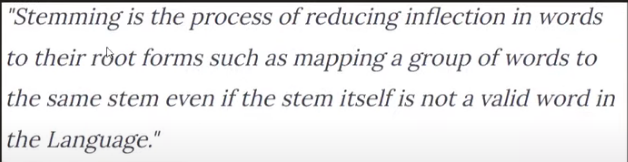

In simple terms , if you are having **inflected words('walks','walked', 'walking') in your text**. Then we will bring those word into their root form like **'walk'**.**And this process is called as stemming.**

- This is a very useful text preprocessing technique.Very much useful specially in case of information retrieval systems. 

- **Example:** Search Engines like google, where if you search for fish, fishing, fishnet any other branch word you get the similar results realted to its stem word fish.

- We will use NLTK library for working on stemming. In NLTK we will have multiple stemmers(stemmer is an algo that performs stemming for you). We use few named as below.

    - 1.Porter stemmer(specifically for english lang)
    - 2.Snow ball stemmer(for other languages)

we will see only portal stemmmer in this video.


In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
def stem_words(text):
  return ' '.join([ps.stem(word) for word in text.split()])

In [ ]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [ ]:
text = '''Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.'''

In [ ]:
stem_words(text)

'probabl my all-tim favorit movie, a stori of selflessness, sacrific and dedic to a nobl cause, but it\' not preachi or boring. it just never get old, despit my have seen it some 15 or more time in the last 25 years. paul lukas\' perform bring tear to my eyes, and bett davis, in one of her veri few truli sympathet roles, is a delight. the kid are, as grandma says, more like "dressed-up midgets" than children, but that onli make them more fun to watch. and the mother\' slow awaken to what\' happen in the world and under her own roof is believ and startling. if i had a dozen thumbs, they\'d all be "up" for thi movie.'

### **Problem with stemming:**

**IMP NOTE:** If you can observe carefully the above results of stemming, the stem word is Even the stem itself is not a valid word in the language. This is the drawback of the stemming. Instaed this is not the correct way to do this.

- So thats why we will move on to the **second technique called Lemmatization**.

## 11.Lemmatization:

**Lemmatization Definition:**

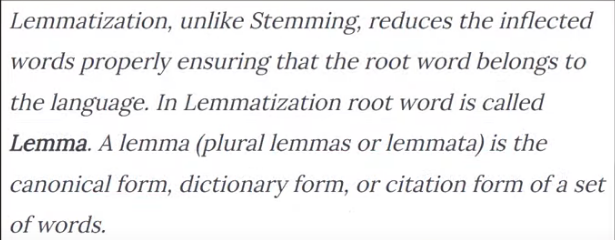

####**Q)Difference between Lemmatization and Stemming?**

**The work of Lemmatization and stemming both are same in case of extracting the root word. The output of stemming  is'nt a valid word in english language itself.**

- But Lemmatization output will always be a valid english word.  

**Q)Difference between Lemmatization and Stemming?**

 - Lemmatization is bit slow because it will search wordnet and gets the valid lemma (root word) from english language . where as stemming is faster compared to lemmatization as stemming is alogorithm based. Where as lemmatization is wordnet search based technique.


- If you won't want to show the output to the user and speed is a matter for you then you need to use stemming.

- But if you want to show the output to the user then in that case you have to use lemmatization. 



Here we will use a word net lemmetizer , Word net is a lexical dictionary where the words in the english language which are related to each other are stored as a net. For example Shoes and Running are both realated words , plate and food are also related words.Like this all the related words are stored in wordnet.

So when you use Wordnet lemmatizer to find the lemma (root word) then we will be searching in this dictionary. And that is why its a bit slower comared to stemming!

In [ ]:
from nltk.tokenize.sonority_sequencing import punctuation
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

sentence ="He was running and eating at same time. He had bad habit of swimming after playing long hours in the Sun"
punctuations = "?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
  if word in punctuations:
    sentence_words.remove(word)

#sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
  print("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos ='v')))
#IMP Note: While doing lemmatization we have to also provide the parameter of POS(Parts Of Speech).
# that is to which pos tagging the data needs to be lemmatized in this example i have choosen verb(v). And the results show the verb lemma.

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
had                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


- So most of the times we will do stemming and move on but if you have situation where we need to show the output to the user in that case we need to use lemmatization.

- In both of them stemming is faster and lemmatization is slower. So if speed matters for you then use the stemming.